## **Exercise: Model Complexity in Linear Model**

**Gunakan dataset 'Admission_Predict'**

        - Features: 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'
        - Target: 'Chance of Admit'

- Lakukan data splitting dengan proporsi 80:20 dan random_state = 42.

- Gunakan model Ridge Regression dan Lasso Regression dengan berbagai nilai alpha (100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001).
  
- Berapa nilai alpha terbaik untuk tiap model?
  
- Bandingkan performa kedua model ditinjau dari nilai MSE-nya, manakah yang lebih baik?

In [37]:
# Import Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [40]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [41]:
df = df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ':'Chance of Admit'})

In [42]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## **Define X and y**

In [43]:
X = df.drop(columns=['Chance of Admit','Serial No.', 'Research'])
y = df['Chance of Admit']

In [44]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


## **Data Splitting**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

## **Feature Scaling**

*Lasso cost function*

![](https://www.statisticshowto.com/wp-content/uploads/2015/09/lasso-regression.png)

- Secara umum, model linear regression lebih baik ketika featurenya di-scaling dulu, karena dapat mempercepat proses komputasi pada saat mencari error terendah (gradient descent). 
- Lasso dan Ridge juga membutuhkan scaling karena Lasso dan Ridge memberikan penalty yang bergantung pada nilai dari coefficient regresinya (Beta atau slope).
- Pada Lasso, nantinya akan berpengaruh pada feature mana saja yang akan tereliminasi (coefficientnya bisa menjadi 0)

In [46]:
# Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## **Linear Regression**

In [47]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)


LinearRegression()

In [48]:
# MSE pada train set
y_pred_train = linreg.predict(X_train)
mean_squared_error(y_train, y_pred_train)

0.003949169301923333

In [49]:
# MSE pada test set
y_pred_test = linreg.predict(X_test)
mean_squared_error(y_test, y_pred_test)

0.004774749242806601

In [50]:
pd.DataFrame({
    'feature names': list(X),
    'coef': linreg.coef_
})

,feature names,coef
0,GRE Score,0.026780
1,TOEFL Score,0.016825
2,University Rating,0.009117
3,SOP,0.000226
4,LOR,0.014807
5,CGPA,0.066512


## **Ridge Regression**

In [51]:
# Ridge

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in range(len(alpha)):
    ridge = Ridge(alpha=alpha[i]) # model
    ridge.fit(X_train, y_train)

    y_predict_train = ridge.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))

    y_predict_test = ridge.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)

    if i==0:
        score = mse_score
        best_alpha = alpha[i]

    if score > mse_score:
        score = mse_score
        best_alpha = alpha[i]

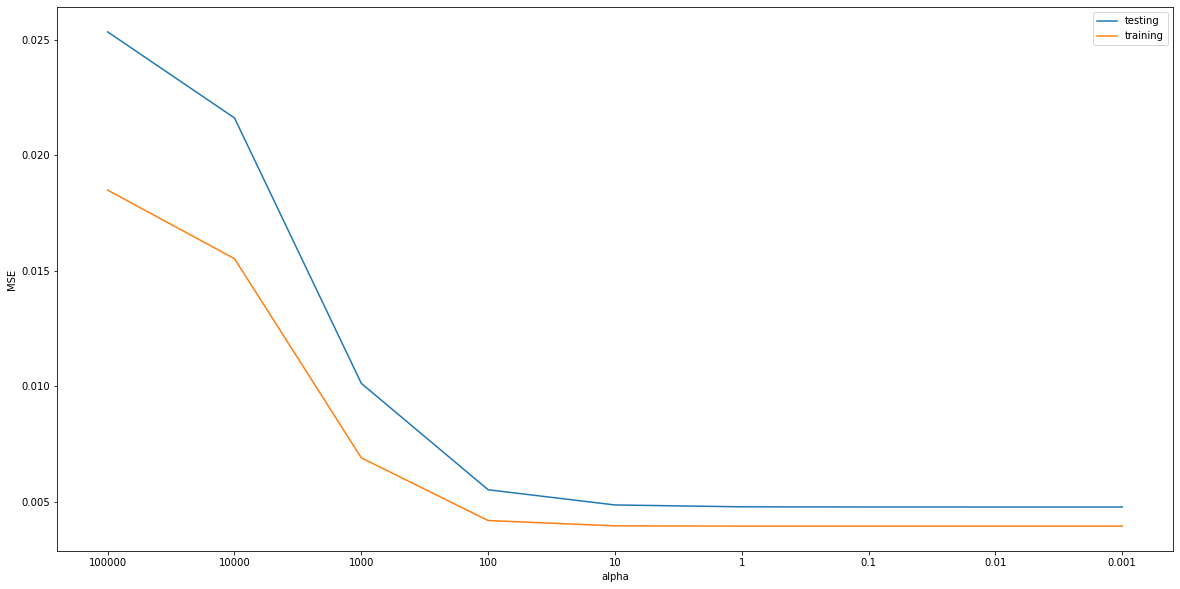

In [52]:
length= range (len(alpha))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing','training'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length, alpha);

In [53]:
print('Alpha terbaik:', best_alpha)
print('Nilai MSE:', score)

Alpha terbaik: 0.001
Nilai MSE: 0.004774758058104843


In [54]:
pd.DataFrame(
    {
        'alpha': alpha,
        'train MSE': training_mse,
        'test MSE': testing_mse
    }
)

,alpha,train MSE,test MSE
0,100000.000,0.018496,0.025345
1,10000.000,0.015526,0.021620
2,1000.000,0.006904,0.010129
3,100.000,0.004190,0.005522
4,10.000,0.003959,0.004864
5,1.000,0.003949,0.004784
6,0.100,0.003949,0.004776
7,0.010,0.003949,0.004775
8,0.001,0.003949,0.004775


## **Comparing MSE**

In [55]:
# Fitting
ridgereg = Ridge(alpha = best_alpha)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.001)

In [56]:
# Predict y_train and y_test
y_reg_train = ridgereg.predict(X_train)
y_reg_test = ridgereg.predict(X_test)

In [57]:
# Coeff pada model ridge
coef_ridgereg = pd.DataFrame({
    'feature_name': list(X),
    'feature_coef': ridgereg.coef_
})

In [58]:
coef_ridgereg

,feature_name,feature_coef
0,GRE Score,0.026780
1,TOEFL Score,0.016825
2,University Rating,0.009117
3,SOP,0.000226
4,LOR,0.014807
5,CGPA,0.066511


In [59]:
print('MSE train:', mean_squared_error(y_train, y_reg_train))
print('MSE test:', mean_squared_error(y_test, y_reg_test))

MSE train: 0.0039491693020553675
MSE test: 0.004774758058104843


## **Interpretasi**

- Semakin besar nilai alpha, maka semakin besar pula penalti yang diberikan pada setiap variabel.
- Pada Ridge, semakin besar alpha, maka cofficient regresi akan semakin kecil, tapi tidak sampai menjadi 0
- Jika nilai alpha terlalu tinggi, model memiliki kecenderungan underfitting, di mana nilai MSE pada train dan test set masih besar (Alpha 100000 sampai 10).
<br><br>
- Didapat nilai alpha terbaik = 0.001 dengan MSE 0.00477.


## **Experiment**

In [60]:
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)

Ridge(alpha=1000)

In [61]:
pd.DataFrame({
    'feature names': list(X),
    'coef': ridge.coef_
})

,feature names,coef
0,GRE Score,0.015389
1,TOEFL Score,0.014450
2,University Rating,0.012175
3,SOP,0.010791
4,LOR,0.011025
5,CGPA,0.017119


## **Lasso Regression**

In [62]:
# Lasso

alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train, y_train)
    
    y_predict_train = lasso.predict(X_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))
    
    y_predict_test = lasso.predict(X_test)
    mse_score = mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)
    
    if i==0:
        score = mse_score
        best_alpha = alpha[i]
        
    if score > mse_score:
        score = mse_score
        best_alpha = alpha[i]

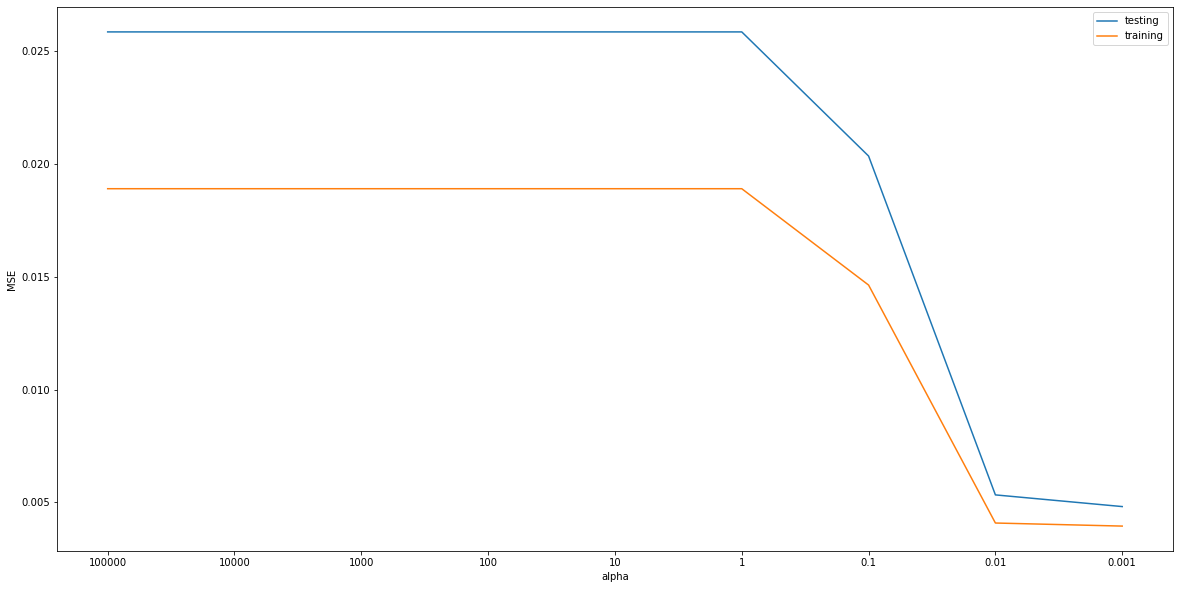

In [63]:
length= range (len(alpha))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing','training'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length, alpha);

In [64]:
print('Alpha terbaik:', best_alpha)
print('Nilai MSE:', score)

Alpha terbaik: 0.001
Nilai MSE: 0.0048153344528467


In [65]:
pd.DataFrame(
    {
        'alpha': alpha,
        'train MSE': training_mse,
        'test MSE': testing_mse
    }
)

,alpha,train MSE,test MSE
0,100000.000,0.018898,0.025845
1,10000.000,0.018898,0.025845
2,1000.000,0.018898,0.025845
3,100.000,0.018898,0.025845
4,10.000,0.018898,0.025845
5,1.000,0.018898,0.025845
6,0.100,0.014629,0.020345
7,0.010,0.004087,0.005333
8,0.001,0.003951,0.004815


## **Comparing MSE**

In [66]:
# Fitting
lassoreg = Lasso(alpha = best_alpha)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [67]:
# Predict
y_reg_train = lassoreg.predict(X_train)
y_reg_test = lassoreg.predict(X_test)

In [68]:
coef_lassoreg = pd.DataFrame({
    'feature_names': list(X),
    'feature_coef': lassoreg.coef_
})

In [69]:
coef_lassoreg

,feature_names,feature_coef
0,GRE Score,0.026397
1,TOEFL Score,0.016528
2,University Rating,0.008886
3,SOP,0.000024
4,LOR,0.014338
5,CGPA,0.066704


In [70]:
print('MSE train:', mean_squared_error(y_train, y_reg_train))
print('MSE test:', mean_squared_error(y_test, y_reg_test))

MSE train: 0.00395056297301447
MSE test: 0.0048153344528467


## **Interpretasi**

- Pada Lasso, semakin besar nilai alpha, maka coefficient regresi semakin kecil, bahkan bisa sampai 0 
- Jika nilai alpha terlalu tinggi, model memiliki kecenderungan underfitting karena nilai MSE dari train dan test set masih tinggi (alpha 100000 sampai 0.01).
- Didapat nilai alpha terbaik = 0.001 dan selisih nilai MSE antar kedua set berbeda tidak terlalu jauh.

## **Experiment**

In [71]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [72]:
pd.DataFrame({
    'feature names': list(X),
    'coef': lasso.coef_
})

,feature names,coef
0,GRE Score,0.023075
1,TOEFL Score,0.013632
2,University Rating,0.006260
3,SOP,0.000000
4,LOR,0.009508
5,CGPA,0.068044


- Lasso bisa juga digunakan sebagai feature selection karena bisa membuat nilai coeficient dari variable menjadi 0.
- Semakin besar nilai alpha, maka penalti yang diberikan pun akan semakin besar, sehingga membuat nilai coeficient dapat menjadi 0. Dalam contoh di atas, jika alpha diset = 1000, yang terjadi adalah nilai coef untuk semua variabel menjadi 0.

## **Conclusion**

1. Ridge regression
   - Alpha terbaik = 0.001
   - MSE test = 0.0047
<br><br>
2. Lasso regression
   - Alpha terbaik = 0.001
   - MSE test = 0.0048